# <center>**GOOGLE PLAY STORE APPS: ANALYSIS & RATING PREDICTION**</center>


In this project, we aim to leverage machine learning techniques to predict the ratings of mobile applications available on the Google Play Store. The project merges two distinct datasets, combining information from the Google Play Store Apps dataset and the Google stock market dataset. By merging these datasets, we seek to explore potential relationships between the performance of apps on the Play Store and Google's stock market data.

We use the datasets:

1) Google Play Store Apps Dataset:
This dataset contains detailed information about various mobile applications available on the Google Play Store. It includes data such as  App Name, Category, Rating, Installs, Price and other relevant features that characterize the apps.
2) Google Stock Market Dataset:
The stock market dataset provides historical data on Google's stock performance, capturing metrics like opening and closing prices, trading volumes, and other financial indicators over time.

<p><div style="text-align: justify;">Merging datasets: The primary focus of the project is to merge these two datasets effectively, creating a unified dataset that combines information about app characteristics from the Google Play Store with Google's stock market performance data.
Explore Correlations: With the merged dataset, we aim to explore potential correlations or patterns between the ratings of Google Play Store apps and Google's stock market indicators. This investigation may help identify any underlying relationships or dependencies between the success of mobile applications and the financial performance of the parent company.
Rating Prediction Model: Develop a machine learning model to predict app ratings based on selected features from both datasets. This predictive model can be used to estimate the potential success of an app on the Play Store given certain characteristics and market conditions.</p></div>

# Data Wrangling

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Load datasets

In [2]:
#loading google playstore_data and google stock market data
playstore_data = pd.read_csv('Google-Playstore.csv')
stock_data = pd.read_csv('GOOGL.csv')

In [3]:
# print shape of each dataset
print('Shape of playstore_data:',playstore_data.shape)
print('Shape of stock_data:',stock_data.shape)

Shape of playstore_data: (2312944, 24)
Shape of stock_data: (4041, 7)


# playstore_data

In [4]:
#let's explore playstore dataset
playstore_data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [5]:
#checking for duplicate values
playstore_data.duplicated().sum()

0

In [6]:
#checking number of unique values 
playstore_data['App Id'].nunique()

2312944

In [7]:
playstore_data.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [8]:
#column names in the dataset
playstore_data.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [9]:
#dropping unwanted columns
playstore_data = playstore_data.drop(['App Id','Developer Website','Developer Email','Privacy Policy','Currency','Developer Id','Scraped Time','Minimum Android'],axis=1)



In [10]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          object 
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Size              object 
 10  Released          object 
 11  Last Updated      object 
 12  Content Rating    object 
 13  Ad Supported      bool   
 14  In App Purchases  bool   
 15  Editors Choice    bool   
dtypes: bool(4), float64(4), int64(1), object(7)
memory usage: 220.6+ MB


In [11]:
#checking null values
playstore_data.isna().sum()

App Name                5
Category                0
Rating              22883
Rating Count        22883
Installs              107
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Released            71053
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [12]:
#calculating percentage of null values in each column
missing_percentage = playstore_data.isnull().sum().sort_values(ascending = False)/len(playstore_data) *100
missing_percentage

Released            3.071972
Rating              0.989345
Rating Count        0.989345
Size                0.008474
Installs            0.004626
Minimum Installs    0.004626
App Name            0.000216
Category            0.000000
Maximum Installs    0.000000
Free                0.000000
Price               0.000000
Last Updated        0.000000
Content Rating      0.000000
Ad Supported        0.000000
In App Purchases    0.000000
Editors Choice      0.000000
dtype: float64

Text(0.5, 1.0, 'Missig percentage of null values')

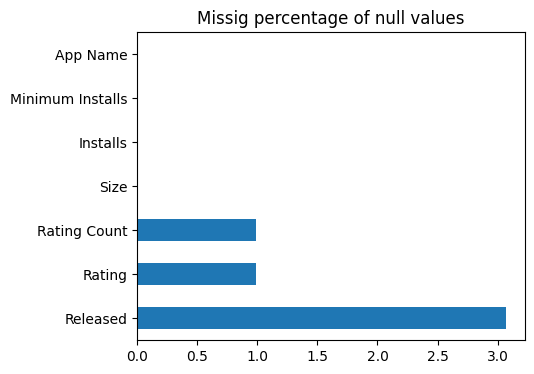

In [13]:
#Let's plot the missing percentage of null values
missing_percentage = missing_percentage[missing_percentage != 0] # Only the missing data
plt.figure(figsize=(5,4))
missing_percentage.plot(kind='barh')
plt.title("Missig percentage of null values")

In [14]:
#droping the null values of the selected columns 
playstore_data.dropna(subset = ['App Name','Minimum Installs','Installs','Size',], inplace = True)

Let's check each column and clean. Rating Count, Rating, Released are important column so it is good to fill the null values.

### Clean Rating and Rating Count columns

In [15]:
#checking Rating column unique values
playstore_data['Rating'].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [16]:
#fill nan val by avg 
playstore_data['Rating'] = playstore_data['Rating'].astype(float)
avg = round(playstore_data['Rating'].mean(),1)
playstore_data['Rating'].fillna(avg,inplace=True) 

In [17]:
#checking Rating Count column unique values
playstore_data['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

In [18]:
# fill nan val by avg 
playstore_data['Rating Count'] = playstore_data['Rating'].astype(float)
avg = round(playstore_data['Rating Count'].mean(),1)
playstore_data['Rating Count'].fillna(avg,inplace=True) 

In [19]:
# Drop rows where Released date is null
playstore_data.dropna(subset=['Released'], inplace=True)

In [20]:
#checking dataset for more null values after 
playstore_data.isna().sum()

App Name            0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Size                0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

In [21]:
playstore_data.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,10M,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,4.4,"5,000+",5000.0,7662,True,0.0,2.9M,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


### Clean installs

In [22]:
playstore_data['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [23]:
#reomove the + symbol
#replace the commas ',' Free in the install column
#It is in the object type, we need to change it into the int type

In [24]:
playstore_data = playstore_data[playstore_data.Installs.str.contains('\+')]
playstore_data.Installs = playstore_data.Installs.str.replace('+','')
playstore_data.Installs = playstore_data.Installs.str.replace(',','')
playstore_data.Installs = playstore_data.Installs.str.replace('Free','0') # covert the free type to num (0)
playstore_data['Installs'] = pd.to_numeric(playstore_data['Installs'])  # converting it to the int type

In [25]:
playstore_data.dtypes['Installs']

dtype('int64')

### Cleaning Size column

In [26]:
playstore_data['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [27]:
#checking the count of each value
value_counts = playstore_data['Size'].value_counts()
print(value_counts)

Size
11M                   60913
12M                   54932
Varies with device    51247
13M                   47018
14M                   44305
                      ...  
7.6k                      1
868M                      1
578M                      1
351M                      1
512M                      1
Name: count, Length: 1650, dtype: int64


In [28]:
# The Size of data can be in GB, MB and KB let's convert the data into the size in MB
#Also convert the data type of size from object to float

In [29]:
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

# repalce the ',' with the dot '.'
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)

# conversion of kbs to mb
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

#conversion of gbs to mb
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

# we get an another missmatch value in the data set which is 'Varies with device' it means the size of the App may varies with the device, but here we can assuming it as 0
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)


In [30]:
playstore_data['Size'].unique()

array(['10', '2.9', '3.7', ..., '405', 0.0032, '512'], dtype=object)

In [31]:
value_counts = playstore_data['Size'].value_counts()
print(value_counts)

Size
11                      60913
12                      54932
0                       51247
13                      47018
14                      44305
                        ...  
765                         1
0.006900000000000001        1
497                         1
664                         1
512                         1
Name: count, Length: 1649, dtype: int64


In [32]:
#convert to float dtype
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(x))
playstore_data.dtypes['Size']

dtype('float64')

In [33]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2241879 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          int64  
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Size              float64
 10  Released          object 
 11  Last Updated      object 
 12  Content Rating    object 
 13  Ad Supported      bool   
 14  In App Purchases  bool   
 15  Editors Choice    bool   
dtypes: bool(4), float64(5), int64(2), object(5)
memory usage: 230.9+ MB


### Cleaning Rleased & Last updated dates

In [34]:
#convert Released and Last updated columns from object dtype to datetime64
playstore_data['Released'] = pd.to_datetime(playstore_data['Released'], format='%b %d, %Y')
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'], format='%b %d, %Y')
playstore_data.dtypes

App Name                    object
Category                    object
Rating                     float64
Rating Count               float64
Installs                     int64
Minimum Installs           float64
Maximum Installs             int64
Free                          bool
Price                      float64
Size                       float64
Released            datetime64[ns]
Last Updated        datetime64[ns]
Content Rating              object
Ad Supported                  bool
In App Purchases              bool
Editors Choice                bool
dtype: object

### Cleaning column Free

In [35]:
playstore_data['Free'].value_counts()

Free
True     2197656
False      44223
Name: count, dtype: int64

In [36]:
# Creating the column Type for free and paid Apps by using the Free column, it's helpfull while dealing with the paid and Free Apps
playstore_data['Type'] = np.where(playstore_data['Free'] == True,'Free','Paid')
playstore_data.drop(['Free'],axis=1, inplace= True )

In [37]:
playstore_data.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Type
0,Gakondo,Adventure,0.0,0.0,10,10.0,15,0.0,10.0,2020-02-26,2020-02-26,Everyone,False,False,False,Free
1,Ampere Battery Info,Tools,4.4,4.4,5000,5000.0,7662,0.0,2.9,2020-05-21,2021-05-06,Everyone,True,False,False,Free
2,Vibook,Productivity,0.0,0.0,50,50.0,58,0.0,3.7,2019-08-09,2019-08-19,Everyone,False,False,False,Free
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10,10.0,19,0.0,1.8,2018-09-10,2018-10-13,Everyone,True,False,False,Free
4,GROW.me,Tools,0.0,0.0,100,100.0,478,0.0,6.2,2020-02-21,2018-11-12,Everyone,False,False,False,Free


In [38]:
playstore_data['Type'].unique()


array(['Free', 'Paid'], dtype=object)

In [39]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2241879 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Name          object        
 1   Category          object        
 2   Rating            float64       
 3   Rating Count      float64       
 4   Installs          int64         
 5   Minimum Installs  float64       
 6   Maximum Installs  int64         
 7   Price             float64       
 8   Size              float64       
 9   Released          datetime64[ns]
 10  Last Updated      datetime64[ns]
 11  Content Rating    object        
 12  Ad Supported      bool          
 13  In App Purchases  bool          
 14  Editors Choice    bool          
 15  Type              object        
dtypes: bool(3), datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 245.9+ MB


### Cleaning Content Rating

In [40]:
playstore_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [41]:
playstore_data['Content Rating'].value_counts()

Content Rating
Everyone           1959917
Teen                190173
Mature 17+           58677
Everyone 10+         32830
Unrated                152
Adults only 18+        130
Name: count, dtype: int64

In [42]:
#let's organize the rating given by different ages groups
playstore_data['Content Rating'] = playstore_data['Content Rating'].replace('Unrated',"Everyone")

#Cleaning other values just to include Everyone, Teens and Adult 
playstore_data['Content Rating'] = playstore_data['Content Rating'].replace('Mature 17+',"Adults")
playstore_data['Content Rating'] = playstore_data['Content Rating'].replace('Adults only 18+',"Adults")
playstore_data['Content Rating'] = playstore_data['Content Rating'].replace('Everyone 10+',"Everyone")

In [43]:
playstore_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

### Checking Category, Ad supported, In App Purchases and Editors Choice columns

In [44]:
playstore_data['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [45]:
playstore_data['Category'].value_counts()

Category
Education                  236116
Music & Audio              153452
Tools                      138334
Business                   136550
Entertainment              135484
Books & Reference          115537
Lifestyle                  115340
Personalization             88860
Health & Fitness            80723
Productivity                75275
Shopping                    71573
Food & Drink                71023
Travel & Local              64882
Finance                     62125
Arcade                      52489
Puzzle                      49915
Casual                      48873
Communication               46145
Sports                      45814
Social                      43132
News & Magazines            41873
Photography                 35163
Medical                     30125
Action                      26626
Maps & Navigation           25052
Adventure                   22540
Simulation                  22476
Educational                 20736
Art & Design                18310
Auto 

In [46]:
playstore_data['Ad Supported'].value_counts()

Ad Supported
True     1135294
False    1106585
Name: count, dtype: int64

In [47]:
#let's change the In App Purchases values from boolean to Yes and No
playstore_data["Ad Supported"] = playstore_data["Ad Supported"].replace({True: 'Yes', False: 'No'})


In [48]:
playstore_data['Ad Supported'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
playstore_data['In App Purchases'].value_counts()

In App Purchases
False    2050280
True      191599
Name: count, dtype: int64

In [50]:
#let's change the In App Purchases values from boolean to Yes and No
playstore_data["In App Purchases"] = playstore_data["In App Purchases"].replace({True: 'Yes', False: 'No'})


In [51]:
playstore_data['In App Purchases'].unique()

array(['No', 'Yes'], dtype=object)

In [52]:
playstore_data['Editors Choice'].value_counts()

Editors Choice
False    2241094
True         785
Name: count, dtype: int64

In [53]:
#let's change the editor's choice values from boolean to Yes and No, because it helps to say whether an app has received the "Editor's Choice" designation
playstore_data["Editors Choice"] = playstore_data["Editors Choice"].replace({True: 'Yes', False: 'No'})



In [54]:
playstore_data['Editors Choice'].unique()

array(['No', 'Yes'], dtype=object)

In [55]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2241879 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Name          object        
 1   Category          object        
 2   Rating            float64       
 3   Rating Count      float64       
 4   Installs          int64         
 5   Minimum Installs  float64       
 6   Maximum Installs  int64         
 7   Price             float64       
 8   Size              float64       
 9   Released          datetime64[ns]
 10  Last Updated      datetime64[ns]
 11  Content Rating    object        
 12  Ad Supported      object        
 13  In App Purchases  object        
 14  Editors Choice    object        
 15  Type              object        
dtypes: datetime64[ns](2), float64(5), int64(2), object(7)
memory usage: 290.8+ MB


In [56]:
#leaned playstore data with required features, ready to merge with stock_data
playstore_data.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Type
0,Gakondo,Adventure,0.0,0.0,10,10.0,15,0.0,10.0,2020-02-26,2020-02-26,Everyone,No,No,No,Free
1,Ampere Battery Info,Tools,4.4,4.4,5000,5000.0,7662,0.0,2.9,2020-05-21,2021-05-06,Everyone,Yes,No,No,Free
2,Vibook,Productivity,0.0,0.0,50,50.0,58,0.0,3.7,2019-08-09,2019-08-19,Everyone,No,No,No,Free
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10,10.0,19,0.0,1.8,2018-09-10,2018-10-13,Everyone,Yes,No,No,Free
4,GROW.me,Tools,0.0,0.0,100,100.0,478,0.0,6.2,2020-02-21,2018-11-12,Everyone,No,No,No,Free


In [57]:
playstore_data.shape

(2241879, 16)

# stock_data

In [58]:
#now, let's explore google stock market dataset
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [59]:
stock_data.duplicated().sum()

0

In [60]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4.041000e+03
mean,533.983149,538.995819,528.658860,533.999060,533.999060,6.909802e+06
std,383.007917,386.590237,379.488087,383.326004,383.326004,7.895987e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,5.206000e+05
25%,241.211212,243.688690,238.873871,241.036041,241.036041,1.844600e+06
50%,342.592590,345.795807,338.598602,342.177185,342.177185,4.191600e+06
75%,791.979980,798.000000,786.200012,790.460022,790.460022,8.702600e+06
max,1699.520020,1726.099976,1660.189941,1717.390015,1717.390015,8.215110e+07


In [61]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [62]:
#drop unwanted column
stock_data=stock_data.drop(['Adj Close'], axis=1)

In [63]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4041 non-null   object 
 1   Open    4041 non-null   float64
 2   High    4041 non-null   float64
 3   Low     4041 non-null   float64
 4   Close   4041 non-null   float64
 5   Volume  4041 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 189.6+ KB


In [64]:
#converting Date column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')

In [65]:
stock_data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [66]:
stock_data.shape

(4041, 6)

# Merging Datasets: playstore_data and stock_data

In [67]:
# Merge datasets on the date columns from both dataset. Released column from playstore dataset and Date column from stock dataset
play_stock_data = pd.merge(playstore_data, stock_data, how='inner', left_on='Released', right_on='Date')

In [68]:
play_stock_data.head()


,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Released,...,Ad Supported,In App Purchases,Editors Choice,Type,Date,Open,High,Low,Close,Volume
0,Gakondo,Adventure,0.0,0.0,10,10.0,15,0.0,10.0,2020-02-26,...,No,No,No,Free,2020-02-26,1394.97998,1413.670044,1376.550049,1390.469971,2488800
1,Monkey Jungle Escape,Arcade,0.0,0.0,10,10.0,35,0.0,21.0,2020-02-26,...,No,No,No,Free,2020-02-26,1394.97998,1413.670044,1376.550049,1390.469971,2488800
2,Saint Jude Thaddeus,Books & Reference,4.3,4.3,1000,1000.0,1105,0.0,4.4,2020-02-26,...,No,No,No,Free,2020-02-26,1394.97998,1413.670044,1376.550049,1390.469971,2488800
3,Audiobooks listen online: Booklis,Books & Reference,4.3,4.3,100000,100000.0,261691,0.0,38.0,2020-02-26,...,Yes,Yes,No,Free,2020-02-26,1394.97998,1413.670044,1376.550049,1390.469971,2488800
4,Maps Redstone House - Modern Mansions,Entertainment,3.4,3.4,10000,10000.0,27173,0.0,43.0,2020-02-26,...,Yes,No,No,Free,2020-02-26,1394.97998,1413.670044,1376.550049,1390.469971,2488800


In [69]:
play_stock_data.shape

(1483784, 22)

In [70]:
play_stock_data.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Price', 'Size', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Type', 'Date', 'Open', 'High', 'Low', 'Close',
       'Volume'],
      dtype='object')

In [71]:
play_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483784 entries, 0 to 1483783
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   App Name          1483784 non-null  object        
 1   Category          1483784 non-null  object        
 2   Rating            1483784 non-null  float64       
 3   Rating Count      1483784 non-null  float64       
 4   Installs          1483784 non-null  int64         
 5   Minimum Installs  1483784 non-null  float64       
 6   Maximum Installs  1483784 non-null  int64         
 7   Price             1483784 non-null  float64       
 8   Size              1483784 non-null  float64       
 9   Released          1483784 non-null  datetime64[ns]
 10  Last Updated      1483784 non-null  datetime64[ns]
 11  Content Rating    1483784 non-null  object        
 12  Ad Supported      1483784 non-null  object        
 13  In App Purchases  1483784 non-null  object

# SUMMARY

<div style="text-align: justify;">The final dataset after merging Google playstore dataset and google stock market dataset contains information about various apps, including their names, categories, ratings, install counts, prices, sizes, release dates, and more. It also includes stock market data such as open, high, low, close prices, and volume. The data was checked for missing values, duplicates and inconsistencies. Missing values were handled appropriately, and there were no duplicates, formatted & validated data types of every column.
